Slope: 3.59e-04 Intercept: 13.96


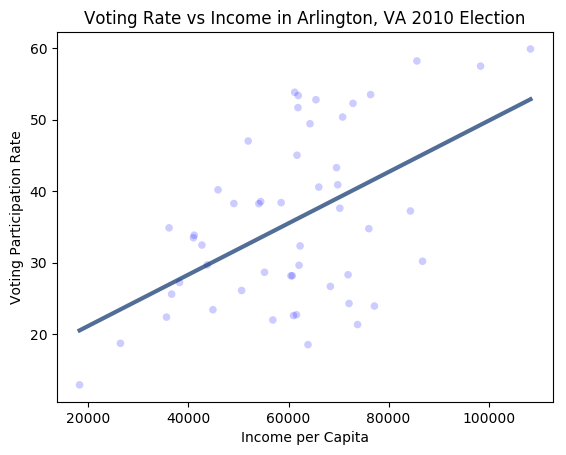

In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import statistics as stat
import thinkstats2 as ts
import thinkplot as tp
import pickle

data = pd.read_pickle('Data/precinct_data.pkl')
sd = data.sort_values(by=['income_per_cap'])

income = sd['income_per_cap'].tolist()
voting = sd['vote_rate'].tolist()

# Save and print the slope and intercept of least squares line
inter, slope = ts.LeastSquares(income, voting)
print('Slope: {:0.2e} Intercept: {:0.2f}'.format(slope, inter))

# Plot the best fit line along with the data
fit_income, fit_voting = ts.FitLine(income, inter, slope)
tp.Scatter(income, voting)
tp.Plot(fit_income, fit_voting)
tp.Show(title='Voting Rate vs Income in Arlington, VA 2010 Election',
        xlabel='Income per Capita', ylabel='Voting Participation Rate')

In [2]:
# Report descriptive statistics on the data
print('Mean income: ${}'.format(round(stat.mean(income))))
print('Mean voting participation rate: {}%'.format(round(stat.mean(voting))))
print('Median income: ${}'.format(stat.median(income)))
print('Median voting participation rate: {}%'.format(stat.median(voting)))
print('Income population standard deviation: ${}'.format(round(stat.pstdev(income))))
print('Voting participation rate population standard deviation: {:0.2f}%'.format(stat.pstdev(voting)))

Mean income: $60563
Mean voting participation rate: 36%
Median income: $61699
Median voting participation rate: 33.83%
Income population standard deviation: $17140
Voting participation rate population standard deviation: 11.95%


In [3]:
# Investigate correlation between income and voting participation
